In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
df = pd.read_csv("D:/CSV Files/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [220]:
df.shape

(891, 15)

In [221]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [222]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### Univariate Analysis

In [223]:
cols = ['survived','pclass','sex','age','sibsp','parch','fare','class','who','alive']
def transform_strings(strings):
    transformed_strings = []
    for string in strings:
        transformed_string = string.replace("_", " ").capitalize()
        transformed_strings.append(transformed_string)
    return transformed_strings
Columns = transform_strings(cols)
print(Columns)
cols

['Survived', 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch', 'Fare', 'Class', 'Who', 'Alive']


['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'class',
 'who',
 'alive']

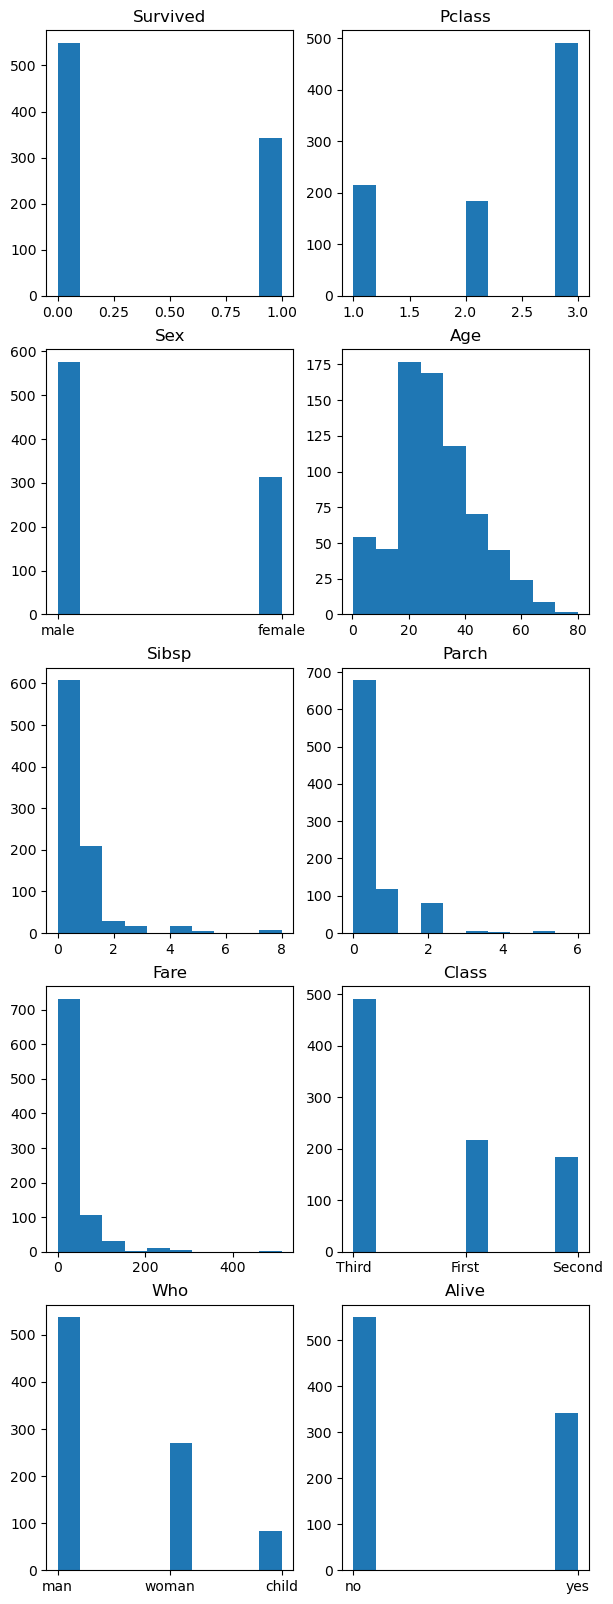

In [224]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(7,20))
s = 0
for i in range(0,5):
    for j in range(0,2):
        axes[i,j].hist(df[cols[s]])
        axes[i,j].set_title(Columns[s])
        s = s+1    

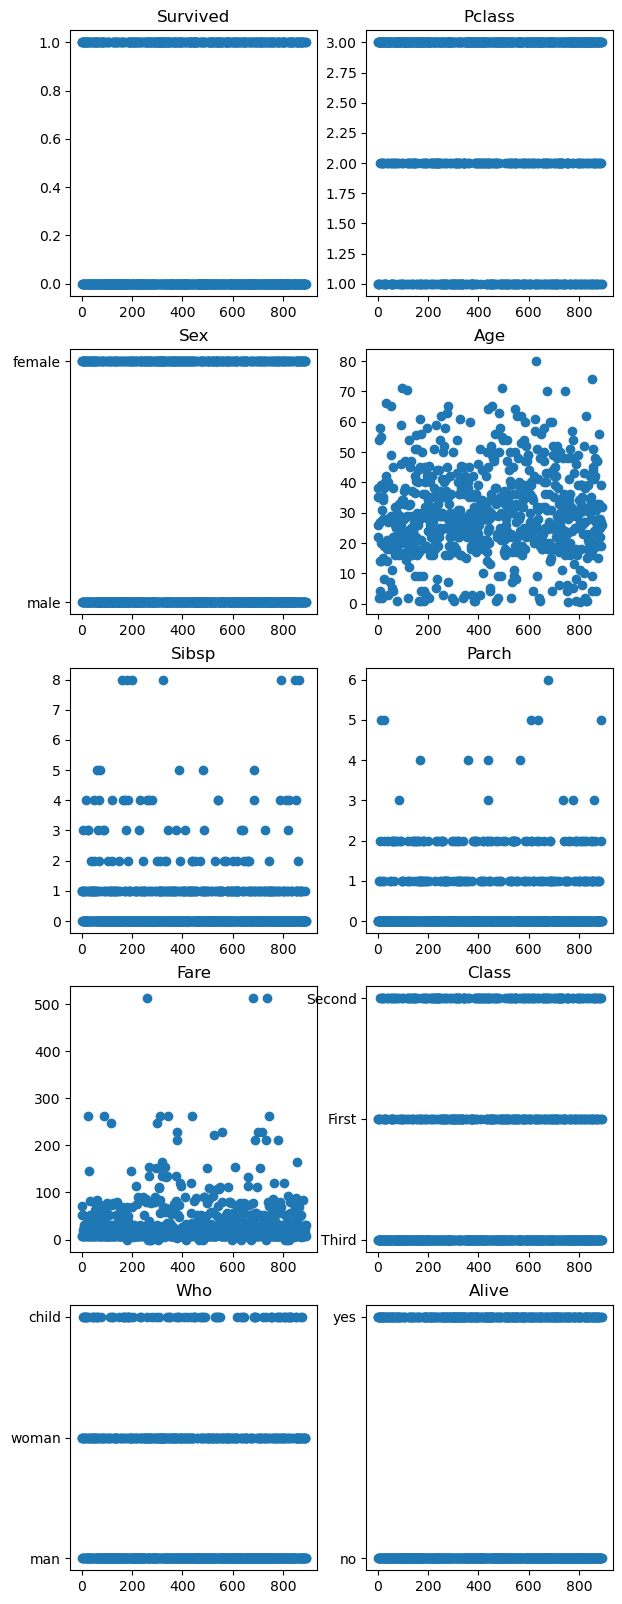

In [225]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(7,20))
s = 0
for i in range(0,5):
    for j in range(0,2):
        axes[i,j].scatter(df.index,df[cols[s]])
        axes[i,j].set_title(Columns[s])
        s = s+1    

In [226]:
cats = ['sex','embark_town','embarked','class','who','alive','deck']
df2 = df.drop(df[cats],axis = 1)
df2 = df2.drop('alone',axis = 1)
df2 = df2.drop('adult_male',axis = 1)
non_cats = df2.columns
Non_cats = transform_strings(non_cats)

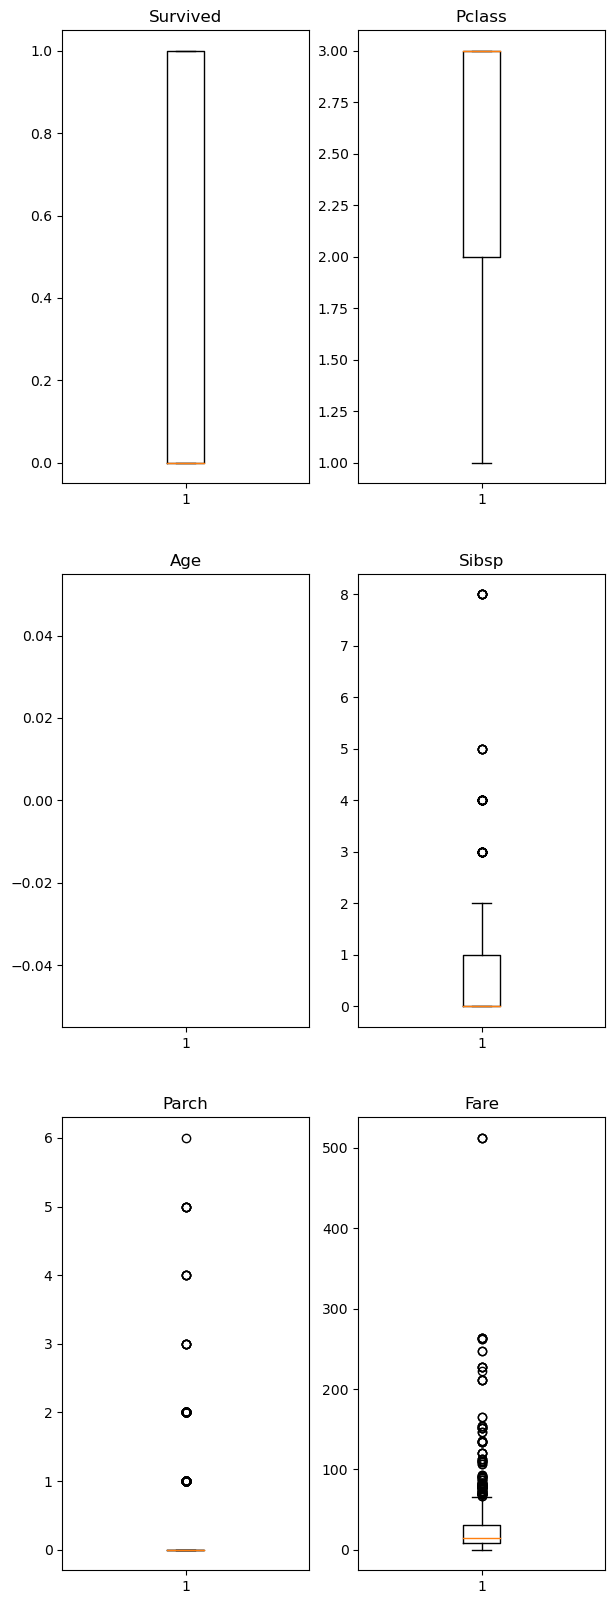

In [227]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7,20))
s = 0
for i in range(0,3):
    for j in range(0,2):
        axes[i,j].boxplot(df[non_cats[s]])
        axes[i,j].set_title(Non_cats[s])
        s = s+1    

### Bivariate Analysis

**Here is some bivariate analysis of the data**

Text(0, 0.5, 'Gender')

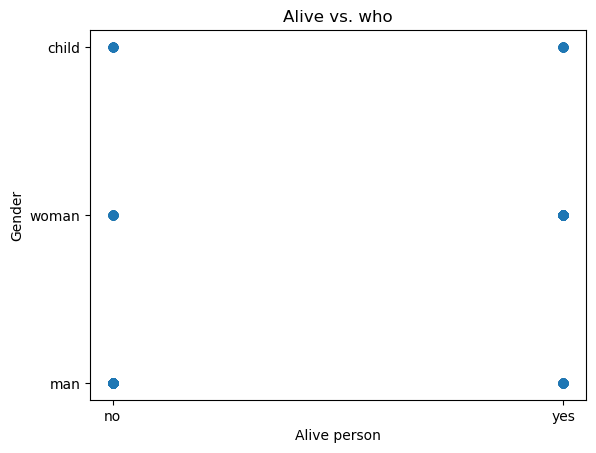

In [228]:
#Scatter Plot
plt.scatter(df.alive, df.who)
plt.title('Alive vs. who')
plt.xlabel('Alive person')
plt.ylabel('Gender')

Text(0, 0.5, 'Age of the person')

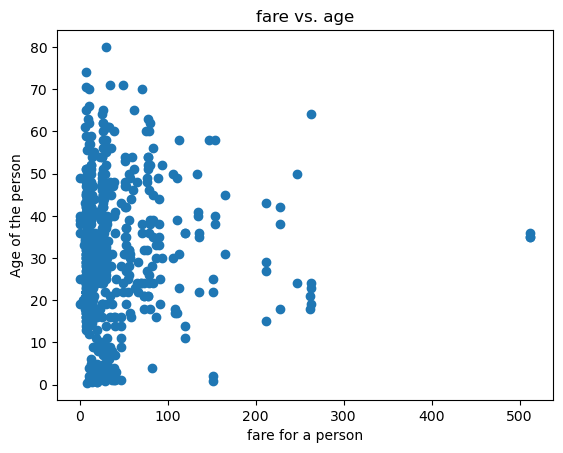

In [229]:
#Scatter Plot
plt.scatter(df.fare, df.age)
plt.title('fare vs. age')
plt.xlabel('fare for a person')
plt.ylabel('Age of the person')

Text(0, 0.5, 'sex of the person')

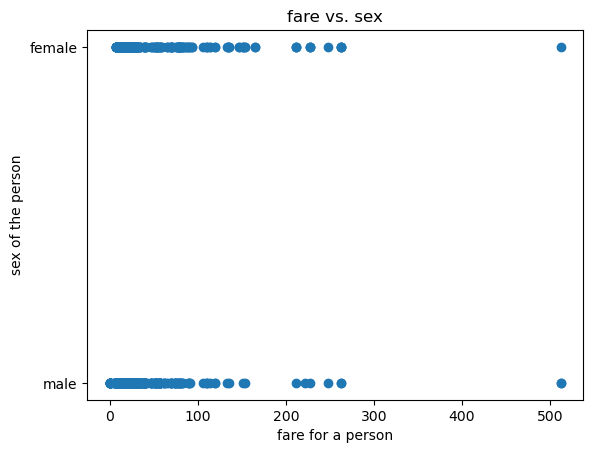

In [230]:
#Scatter Plot
plt.scatter(df.fare, df.sex)
plt.title('fare vs. sex')
plt.xlabel('fare for a person')
plt.ylabel('sex of the person')

### MultiVariate Analysis

In [231]:
corr = df.corr(numeric_only = True)
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<Axes: >

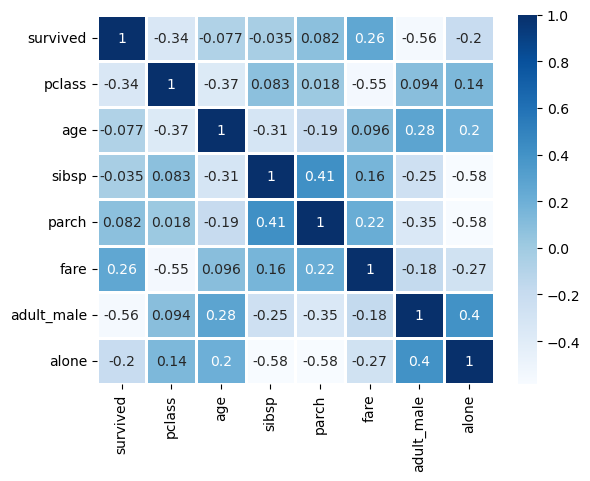

In [232]:
sns.heatmap(corr,annot= True,linewidths = 1,cmap='Blues')

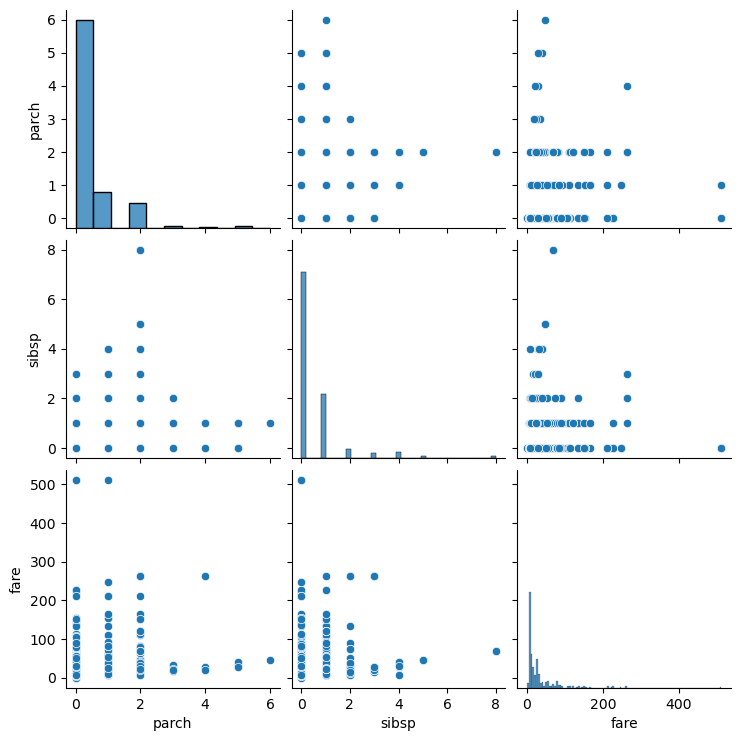

In [233]:
sns.pairplot(data = df[['parch', 'sibsp', 'fare']])

### Descriptive Statistics

In [234]:
stats = df.describe(include = 'all')
print(stats)

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [235]:
df.mean(numeric_only = True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [236]:
df.median(numeric_only = True)

survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [237]:
df.max(numeric_only = True)

survived             1
pclass               3
age               80.0
sibsp                8
parch                6
fare          512.3292
adult_male        True
alone             True
dtype: object

In [238]:
df.std(numeric_only = True)

survived       0.486592
pclass         0.836071
age           14.526497
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64

### Handling Missing Values

In [239]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [240]:
meanAge = df['age'].mean()
df['age'].fillna(meanAge,inplace = True)

In [241]:
# Since there are lot of NaN values in deck column we can just remove it
df.drop('deck',axis = 1,inplace = True)

In [242]:
cleans = ['embarked','embark_town']
df.dropna(subset = cleans,inplace= True)

In [243]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [244]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [245]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [246]:
df = df[df['embarked']!=7.8958]
df = df[df['embark_town']!=7.8958]
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

### Handling Outliers

In [247]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['fare']))
print(z)

0      0.500240
1      0.788947
2      0.486650
3      0.422861
4      0.484133
         ...   
886    0.384475
887    0.042213
888    0.174084
889    0.042213
890    0.490173
Name: fare, Length: 889, dtype: float64


In [248]:
threshold = 2
 
# Position of the outlier
print(np.where(z > 2))

(array([ 27,  31,  87, 117, 194, 257, 267, 268, 296, 298, 304, 310, 317,
       318, 324, 331, 333, 336, 340, 372, 376, 379, 437, 497, 526, 556,
       608, 659, 678, 688, 699, 707, 715, 729, 736, 741, 778, 854],
      dtype=int64),)


In [249]:
Q1 = np.percentile(df['fare'], 25, method='midpoint')
Q3 = np.percentile(df['fare'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

23.1042


In [250]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['fare']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['fare']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: 65.6563
114
Lower Bound: -26.7605
0


In [252]:
def remove_outlier(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    iqr = q3-q1
    low_range = q1 - (1.5*iqr)
    up_range = q3 + (1.5*iqr)
    return low_range,up_range   

In [253]:
low,up = remove_outlier(df['fare'])
df['fare'] = np.where(df['fare']>up,up,df['fare'])
df['fare'] = np.where(df['fare']<low,low,df['fare'])

### Check for Categorical columns and perform encoding

In [254]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.sex=le.fit_transform(df.sex)

In [255]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,65.6563,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [256]:
df.who=le.fit_transform(df.who)

In [257]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,1,True,Southampton,no,False
1,1,1,0,38.0,1,0,65.6563,C,First,2,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,2,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,2,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,1,True,Southampton,no,True


In [258]:
df.embarked = le.fit_transform(df.embarked)
df['class'] = le.fit_transform(df['class'])
df.adult_male = le.fit_transform(df.adult_male)
df.alive = le.fit_transform(df.alive)
df.alone = le.fit_transform(df.alone)

In [259]:
#One hot encoding
df_main=pd.get_dummies(df,columns=['embark_town'])

In [260]:
df_main.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,0,0,0,0,1
1,1,1,0,38.0,1,0,65.6563,0,0,2,0,1,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,1,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,1,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,0,1,0,0,1


In [261]:
df_main.corr(numeric_only = True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.313658,-0.169718,-0.335549,0.323191,-0.555520,1.000000,-0.206207,0.169966,0.004536,-0.151777
pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.713413,0.164681,1.000000,-0.193029,0.090098,-0.335549,0.138553,-0.245733,0.220558,0.076466
sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.230325,0.110320,0.127741,-0.638309,0.908250,-0.541585,0.306985,-0.084520,-0.075217,0.121405
age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.131713,-0.028927,-0.327954,0.351840,0.258966,-0.074673,0.177712,0.033853,-0.012823,-0.021589
sibsp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.335817,0.068900,0.081656,-0.134887,-0.255401,-0.034040,-0.584186,-0.060074,-0.026692,0.069438
parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.296199,0.040449,0.016824,-0.054389,-0.351945,0.083151,-0.583112,-0.011588,-0.081585,0.061512
fare,0.313658,-0.713413,-0.230325,0.131713,0.335817,0.296199,1.000000,-0.203554,-0.713413,0.155463,-0.254145,0.313658,-0.460386,0.267138,-0.170732,-0.126586
embarked,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,-0.203554,1.000000,0.164681,-0.066062,0.094347,-0.169718,0.062532,-0.936244,-0.208278,0.951435
class,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.713413,0.164681,1.000000,-0.193029,0.090098,-0.335549,0.138553,-0.245733,0.220558,0.076466
who,0.323191,-0.193029,-0.638309,0.351840,-0.134887,-0.054389,0.155463,-0.066062,-0.193029,1.000000,-0.435459,0.323191,0.004125,0.033168,0.093603,-0.087985


<Axes: >

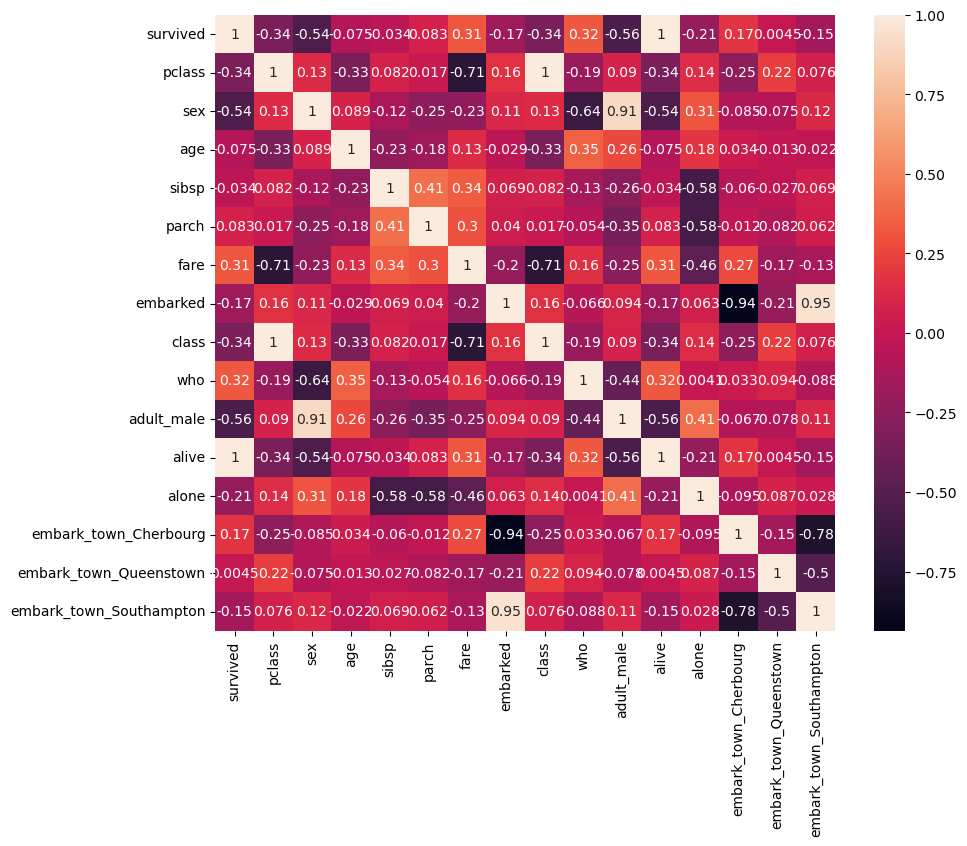

In [262]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(numeric_only=True),annot=True)

### Split the data into dependent and independent variables

From the data we can see that Fare is the Dependent attribute/variable

In [263]:
y = df_main['fare']
y.head()

0     7.2500
1    65.6563
2     7.9250
3    53.1000
4     8.0500
Name: fare, dtype: float64

In [264]:
X = df_main.drop(columns = ['fare'],axis = 1)
X.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,alive,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,2,2,1,1,0,0,0,0,1
1,1,1,0,38.0,1,0,0,0,2,0,1,0,1,0,0
2,1,3,0,26.0,0,0,2,2,2,0,1,1,0,0,1
3,1,1,0,35.0,1,0,2,0,2,0,1,0,0,0,1
4,0,3,1,35.0,0,0,2,2,1,1,0,1,0,0,1


### Scale the independent variables

In [265]:
name = X.columns
name

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked',
       'class', 'who', 'adult_male', 'alive', 'alone', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [266]:
X = X.replace({'adult_male':{'True':1,'False':0}})
X.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,alive,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,2,2,1,1,0,0,0,0,1
1,1,1,0,38.0,1,0,0,0,2,0,1,0,1,0,0
2,1,3,0,26.0,0,0,2,2,2,0,1,1,0,0,1
3,1,1,0,35.0,1,0,2,0,2,0,1,0,0,0,1
4,0,3,1,35.0,0,0,2,2,1,1,0,1,0,0,1


In [267]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

In [268]:
X_scaled=sc.fit_transform(X)
X_scaled

array([[-0.78696114,  0.82520863,  0.73534203, ..., -0.48271079,
        -0.30794088,  0.61679395],
       [ 1.27071078, -1.57221121, -1.35991138, ...,  2.07163382,
        -0.30794088, -1.62128697],
       [ 1.27071078,  0.82520863, -1.35991138, ..., -0.48271079,
        -0.30794088,  0.61679395],
       ...,
       [-0.78696114,  0.82520863, -1.35991138, ..., -0.48271079,
        -0.30794088,  0.61679395],
       [ 1.27071078, -1.57221121,  0.73534203, ...,  2.07163382,
        -0.30794088, -1.62128697],
       [-0.78696114,  0.82520863,  0.73534203, ..., -0.48271079,
         3.24737656, -1.62128697]])

In [269]:
X=pd.DataFrame(X_scaled,columns=name)
X

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,alive,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,-0.786961,0.825209,0.735342,-0.590495,0.431350,-0.474326,0.586840,0.825209,-0.352559,0.809626,-0.786961,-1.229349,-0.482711,-0.307941,0.616794
1,1.270711,-1.572211,-1.359911,0.643971,0.431350,-0.474326,-1.939555,-1.572211,1.332520,-1.235139,1.270711,-1.229349,2.071634,-0.307941,-1.621287
2,1.270711,0.825209,-1.359911,-0.281878,-0.475199,-0.474326,0.586840,0.825209,1.332520,-1.235139,1.270711,0.813439,-0.482711,-0.307941,0.616794
3,1.270711,-1.572211,-1.359911,0.412509,0.431350,-0.474326,0.586840,-1.572211,1.332520,-1.235139,1.270711,-1.229349,-0.482711,-0.307941,0.616794
4,-0.786961,0.825209,0.735342,0.412509,-0.475199,-0.474326,0.586840,0.825209,-0.352559,0.809626,-0.786961,0.813439,-0.482711,-0.307941,0.616794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.786961,-0.373501,0.735342,-0.204724,-0.475199,-0.474326,0.586840,-0.373501,-0.352559,0.809626,-0.786961,0.813439,-0.482711,-0.307941,0.616794
885,1.270711,-1.572211,-1.359911,-0.821957,-0.475199,-0.474326,0.586840,-1.572211,1.332520,-1.235139,1.270711,0.813439,-0.482711,-0.307941,0.616794
886,-0.786961,0.825209,-1.359911,0.003524,0.431350,2.006119,0.586840,0.825209,1.332520,-1.235139,-0.786961,-1.229349,-0.482711,-0.307941,0.616794
887,1.270711,-1.572211,0.735342,-0.281878,-0.475199,-0.474326,-1.939555,-1.572211,-0.352559,0.809626,1.270711,0.813439,2.071634,-0.307941,-1.621287


### Splitting data into testing and training

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [272]:
X_train.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,alive,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
363,-0.786961,0.825209,0.735342,0.003524,0.431350,-0.474326,-0.676357,0.825209,-0.352559,0.809626,-0.786961,-1.229349,-0.482711,3.247377,-1.621287
255,1.270711,-1.572211,-1.359911,0.003524,-0.475199,-0.474326,-1.939555,-1.572211,1.332520,-1.235139,1.270711,0.813439,2.071634,-0.307941,-1.621287
476,-0.786961,0.825209,0.735342,-0.050416,0.431350,-0.474326,0.586840,0.825209,-0.352559,0.809626,-0.786961,-1.229349,-0.482711,-0.307941,0.616794
271,1.270711,-0.373501,-1.359911,0.875433,-0.475199,0.765897,0.586840,-0.373501,1.332520,-1.235139,1.270711,-1.229349,-0.482711,-0.307941,0.616794
553,1.270711,0.825209,-1.359911,-0.590495,-0.475199,-0.474326,0.586840,0.825209,1.332520,-1.235139,1.270711,0.813439,-0.482711,-0.307941,0.616794


In [273]:
X_test.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,alive,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
14,-0.786961,0.825209,-1.359911,-1.207728,-0.475199,-0.474326,0.58684,0.825209,-2.037637,-1.235139,-0.786961,0.813439,-0.482711,-0.307941,0.616794
158,-0.786961,0.825209,0.735342,0.003524,6.777195,2.006119,0.58684,0.825209,-0.352559,0.809626,-0.786961,-1.229349,-0.482711,-0.307941,0.616794
762,1.270711,-1.572211,-1.359911,0.489663,0.431350,2.006119,0.58684,-1.572211,1.332520,-1.235139,1.270711,-1.229349,-0.482711,-0.307941,0.616794
740,-0.786961,-1.572211,0.735342,0.489663,0.431350,-0.474326,0.58684,-1.572211,-0.352559,0.809626,-0.786961,-1.229349,-0.482711,-0.307941,0.616794
482,1.270711,0.825209,-1.359911,2.572824,-0.475199,-0.474326,0.58684,0.825209,1.332520,-1.235139,1.270711,0.813439,-0.482711,-0.307941,0.616794


In [274]:
y_train

364    15.5000
256    65.6563
477     7.0458
272    19.5000
554     7.7750
        ...   
837     8.0500
193    26.0000
630    30.0000
560     7.7500
685    41.5792
Name: fare, Length: 711, dtype: float64